In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)                # Loading the data

In [4]:
x,y  = mnist['data'], mnist.target                # putting the data, target values in x and y variables rispectively
len(x)

70000

In [5]:
x[0].shape

(784,)

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

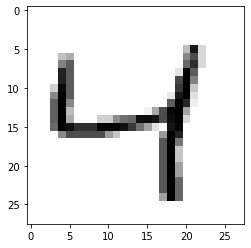

In [7]:
import matplotlib.pyplot as plt                     # trying to plot and look at the data
plt.imshow(x[2].reshape(-1,28), cmap='binary')
plt.show()

In [8]:
# splitting the data

x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

In [9]:
# shiffling the train Data

import numpy as np
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
shuffle_index

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [10]:
x_train = x[shuffle_index]
y_train = y[shuffle_index]

In [10]:
# y_train_5 = (y_train == '5')
# y_train_5

array([False, False, False, ..., False, False, False])

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
clf = SGDClassifier(loss='hinge', penalty='l2')

In [13]:
sgd_clf = SGDClassifier(random_state = 42, max_iter = 5)
sgd_clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5, random_state=42)

In [14]:
y_pred = sgd_clf.predict(x_train)

In [15]:
score = sgd_clf.decision_function([x_test[0]])
score

array([[-390183.17627409, -780315.060279  , -331146.87852281,
        -129949.70047669, -573328.4267419 , -311424.81003513,
        -816135.80804169,   87600.06582171, -282436.92607691,
         -88666.68873239]])

In [16]:
test_0 = sgd_clf.predict([x_test[0]])
test_0

array(['7'], dtype='<U1')

In [17]:
y_test[0]

'7'

In [16]:
sgd_clf.predict([x_test[6000]])

array([False])

In [17]:
y_test[:10]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9'], dtype=object)

In [62]:
from sklearn.model_selection import cross_val_score

In [86]:
score = cross_val_score(sgd_clf,x_train,y_train_5,cv = 3, scoring = 'accuracy')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [87]:
score.mean()

0.9596666666666667

In [88]:
from sklearn.metrics import classification_report

In [89]:
report = classification_report(y_train_5,y_pred,output_dict =True)

In [90]:
report

{'False': {'precision': 0.9554772300839953,
  'recall': 0.9983326920610491,
  'f1-score': 0.976434958693977,
  'support': 54579},
 'True': {'precision': 0.9693911873528422,
  'recall': 0.5316362294779561,
  'f1-score': 0.6866809625923278,
  'support': 5421},
 'accuracy': 0.9561666666666667,
 'macro avg': {'precision': 0.9624342087184188,
  'recall': 0.7649844607695027,
  'f1-score': 0.8315579606431525,
  'support': 60000},
 'weighted avg': {'precision': 0.9567343561232357,
  'recall': 0.9561666666666667,
  'f1-score': 0.950255685146193,
  'support': 60000}}

In [91]:
from sklearn.metrics import precision_score, recall_score

In [92]:
precision = precision_score(y_train_5,y_pred)
precision

0.9693911873528422

In [93]:
recall = recall_score(y_train_5,y_pred)
recall

0.5316362294779561

In [94]:
from sklearn.model_selection import cross_val_predict

In [95]:
y_score = cross_val_predict(sgd_clf, x_train, y_train_5, method = 'decision_function', cv = 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [96]:
y_score

array([-545086.1906455 , -200238.20632717, -366873.76172794, ...,
       -626454.84454281, -716313.74931348, -581950.04601147])

In [97]:
from sklearn.metrics import precision_recall_curve

In [98]:
precision_,recall,thresholds = precision_recall_curve(y_train_5,y_score)

In [99]:
import matplotlib.pyplot as plt

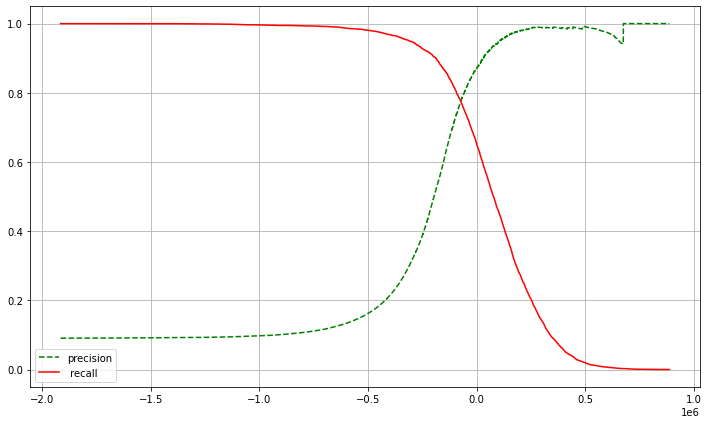

In [100]:
plt.figure(figsize= (12,7))
plt.plot(thresholds,precision_[:-1],'g--', label = 'precision')
plt.plot(thresholds,recall[:-1],'r-', label =' recall' )
plt.grid(True)
plt.legend()
plt.show()

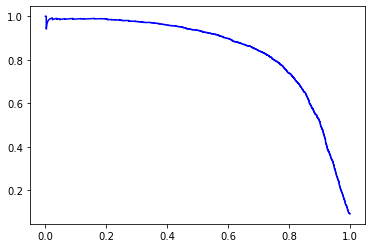

In [101]:
plt.plot(recall,precision_,'b-')
plt.show()

In [102]:
from sklearn.metrics import roc_curve

In [103]:
fpr,tpr,thresholds = roc_curve(y_train_5, y_score)

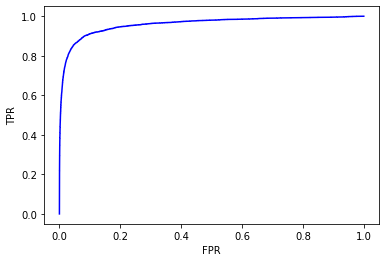

In [112]:
plt.plot(fpr,tpr,'b-')
plt.xlabel('FPR')
plt.ylabel("TPR")
plt.show()

In [113]:
from sklearn.metrics import roc_auc_score

In [116]:
area = roc_auc_score(y_train_5, y_score)
area

0.9598058535696421